# **Predicting Anti-inflammatory peptides**

Jupyter notebook by Gaurav Ojha

# **Install conda**

In [1]:
! conda update --all -y
! conda install scikit-learn-intelex

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



# **Download and Install Pfeature**

In [2]:
! wget https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip

--2022-02-24 03:22:36--  https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip
Resolving github.com (github.com)... 13.234.210.38
Connecting to github.com (github.com)|13.234.210.38|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip [following]
--2022-02-24 03:22:42--  https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 511222 (499K) [application/zip]
Saving to: ‘Pfeature.zip.4’

Pfeature.zip.4      100%[===================>] 499.24K   456KB/s    in 1.1s    

2022-02-24 03:22:43 (456 KB/s) - ‘Pfeature.zip.4’ saved [511222/511222]



In [3]:
! unzip Pfeature.zip -y

Archive:  Pfeature.zip
caution: filename not matched:  -y


In [4]:
cd Pfeature

/home/lazyrook/Documents/ML-model_IBD/Pfeature


In [5]:
! python setup.py install

/home/lazyrook/anaconda3/lib/python3.9/distutils/dist.py:274: UserWarning: Unknown distribution option: 'zip_safe'
  warnings.warn(msg)
running install
running build
running build_py
running install_lib
running install_egg_info
Removing /home/lazyrook/anaconda3/lib/python3.9/site-packages/Pfeature-1.0-py3.9.egg-info
Writing /home/lazyrook/anaconda3/lib/python3.9/site-packages/Pfeature-1.0-py3.9.egg-info


# **Install CD-HIT**

In [6]:
! conda install -c bioconda cd-hit -y

Solving environment: done

# All requested packages already installed.



# **Load peptide dataset**

In [9]:
! wget https://raw.githubusercontent.com/gauravsucks/IBD_therapeutics/main/benchmarking-positive.txt

--2022-02-24 03:26:52--  https://raw.githubusercontent.com/gauravsucks/IBD_therapeutics/main/benchmarking-positive.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 503 Backend is unhealthy
2022-02-24 03:26:52 ERROR 503: Backend is unhealthy.



In [10]:
! wget https://raw.githubusercontent.com/gauravsucks/IBD_therapeutics/main/benchmarking-negative.txt

--2022-02-24 03:26:54--  https://raw.githubusercontent.com/gauravsucks/IBD_therapeutics/main/benchmarking-negative.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 503 Backend is unhealthy
2022-02-24 03:26:55 ERROR 503: Backend is unhealthy.



In [1]:
! cat benchmarking-negative.txt

>Negative_1
ADFSNYGAVVDVYAPGKDIT
>Negative_2
AGDGPPLCSQNLGAPGGGPD
>Negative_3
AGWLADRSVRYPI
>Negative_4
AKPRKISVDRGNNGHQTINK
>Negative_5
AKYLWEWASVRFS
>Negative_6
ALWNLHGQALFLGIVLFIFG
>Negative_7
AMVYLGAKDSTR
>Negative_8
APGERPSGMFDSSVLCEC
>Negative_9
APITAYAQQTRGLLGCII
>Negative_10
APTGSGKSTKVPAAYAAK
>Negative_11
CARAQAPPPSWDQMRKCL
>Negative_12
CGYKDVDKAPFNGMTGCGNT
>Negative_13
CNTCVTQTVDFSLDPTFT
>Negative_14
CPPYVEVCQGNVQAA
>Negative_15
DAGIFMAVAAGNENMDAQHS
>Negative_16
DATYSRCGSGPWITPRCLVD
>Negative_17
DAWREGEEFVVEFDLPGIKA
>Negative_18
DCNGHGTHVAGTVGGTKYGL
>Negative_19
DDEDLDEFKPIVQYDNFQD
>Negative_20
DDIKATYDKGILTVSVAVSE
>Negative_21
DDNGPHDPLPQDPDNTDDNG
>Negative_22
DDSPDLPKLKPD
>Negative_23
DGGGGHSHDSGHGGGDPHLP
>Negative_24
DKILVQAGEAETMTP
>Negative_25
DLAVELAYLGNL
>Negative_26
DNEILQIVDELSEDITKYFMKL
>Negative_27
DNPIDSCWRGDSNWAQNRMK
>Negative_28
DNYANLEKFRALSKI
>Negative_29
DPHLPTLLLGSSGSGGDDDD
>Negative_30
DSNSNEGRHHLLVSGAGDGP
>Negative_31
DVLAVAFSPDDRLIVSAGRD
>Negative_32
EAAK

# **Remove redundant sequences using CD-HIT**

In [12]:
! cd-hit -i benchmarking-positive.txt -o train_po_cdhit.txt -c 0.8

Program: CD-HIT, V4.8.1 (+OpenMP), Apr 07 2021, 10:57:21
Command: cd-hit -i benchmarking-positive.txt -o
         train_po_cdhit.txt -c 0.8

Started: Thu Feb 24 03:27:09 2022
                            Output                              
----------------------------------------------------------------
total seq: 1258
longest and shortest : 25 and 11
Total letters: 21346
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90490944

comparing sequences from          0  to       1258
.
     1258  finished       1258  clusters

Approximated maximum memory consumption: 76M
writing new database
writing clustering information
program completed !

Total CPU time 0.08


In [13]:
! cd-hit -i benchmarking-negative.txt -o train_ne_cdhit.txt -c 0.8

Program: CD-HIT, V4.8.1 (+OpenMP), Apr 07 2021, 10:57:21
Command: cd-hit -i benchmarking-negative.txt -o
         train_ne_cdhit.txt -c 0.8

Started: Thu Feb 24 03:27:18 2022
                            Output                              
----------------------------------------------------------------
total seq: 1887
longest and shortest : 25 and 11
Total letters: 29827
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90476719

comparing sequences from          0  to       1887
.
     1887  finished       1887  clusters

Approximated maximum memory consumption: 76M
writing new database
writing clustering information
program completed !

Total CPU time 0.09


In [14]:
! ls -l

total 3232
-rw-rw-r-- 1 lazyrook lazyrook   58912 Feb 21 13:48 benchmarking-negative.txt
-rw-rw-r-- 1 lazyrook lazyrook   58912 Feb 24 01:37 benchmarking-negative.txt.1
-rw-rw-r-- 1 lazyrook lazyrook   58912 Feb 24 01:53 benchmarking-negative.txt.2
-rw-rw-r-- 1 lazyrook lazyrook   58912 Feb 24 02:49 benchmarking-negative.txt.3
-rw-rw-r-- 1 lazyrook lazyrook   40367 Feb 21 13:48 benchmarking-positive.txt
-rw-rw-r-- 1 lazyrook lazyrook   40367 Feb 24 01:36 benchmarking-positive.txt.1
-rw-rw-r-- 1 lazyrook lazyrook   40367 Feb 24 01:53 benchmarking-positive.txt.2
-rw-rw-r-- 1 lazyrook lazyrook   40367 Feb 24 02:49 benchmarking-positive.txt.3
drwxr-xr-x 3 lazyrook lazyrook    4096 Oct 23  2019 build
-rw-r--r-- 1 lazyrook lazyrook   86079 Sep 29  2020 Functions_Tables.pdf
-rw-rw-r-- 1 lazyrook lazyrook     326 Feb 24 02:55 model_report.txt
drwxr-xr-x 3 lazyrook lazyrook    4096 Feb 21 13:48 Pfeature
-rw-r--r-- 1 lazyrook lazyrook  221146 Sep 29  2020 Pfeature_Descriptors.pdf
-rw-r--r-- 1 la

In [15]:
! grep ">" train_po_cdhit.txt | wc -l

1258


In [16]:
! grep ">" benchmarking-positive.txt | wc -l

1258


In [17]:
! grep ">" benchmarking-negative.txt | wc -l

1887


In [18]:
! grep ">" train_ne_cdhit.txt | wc -l

1887


# **Calculate features using the Pfeature library**

Feature classes provided by Pfeature is summarized in the tables below.

**Composition Based Features**

Feature claass | Description | Function
---|---|---
AAC | Amino acid composition | aac_wp
DPC | Dipeptide composition | dpc_wp
TPC | Tripeptide composition | tpc_wp
ABC | Atom and bond composition | atc_wp, btc_wp
PCP | Physico-chemical properties | pcp_wp
AAI | Amino acid index composition | aai_wp
RRI | Repetitive Residue Information | rri_wp
DDR | Distance distribution of residues |ddr_wp
PRI | Physico-chemical properties repeat composition | pri_wp
SEP | Shannon entropy | sep_wp
SER | Shannon entropy of residue level | ser_wp
SPC | Shannon entropy of physicochemical property | spc_wp
ACR | Autocorrelation | acr_wp
CTC | Conjoint Triad Calculation | ctc_wp
CTD | Composition enhanced transition distribution | ctd_wp
PAAC | Pseudo amino acid composition | paac_wp
APAAC | Amphiphilic pseudo amino acid composition | apaac_wp
QSO | Quasi sequence order | qos_wp
SOC | Sequence order coupling | soc_wp

[Pfeature Manual](https://webs.iiitd.edu.in/raghava/pfeature/Pfeature_Manual.pdf)

### **Define functions for calculating the different features**

In [19]:
import pandas as pd

In [20]:
# Amino acid composition (AAC)

from Pfeature.pfeature import aac_wp

def aac(input):
  a = input.rstrip('txt')
  output = a + 'aac.csv'
  df_out = aac_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

aac('train_po_cdhit.txt')

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,15.00,0.00,5.00,10.00,0.00,5.00,0.0,10.00,10.00,5.00,0.0,10.00,0.00,15.0,5.00,5.00,5.00,0.00,0.0,0.00
1,30.00,0.00,0.00,30.00,0.00,5.00,0.0,5.00,10.00,0.00,0.0,0.00,15.00,0.0,0.00,0.00,5.00,0.00,0.0,0.00
2,25.00,0.00,8.33,0.00,16.67,8.33,0.0,8.33,8.33,16.67,0.0,0.00,0.00,0.0,8.33,0.00,0.00,0.00,0.0,0.00
3,20.00,0.00,5.00,5.00,0.00,20.00,0.0,0.00,5.00,0.00,0.0,0.00,0.00,15.0,0.00,10.00,0.00,5.00,10.0,5.00
4,7.14,14.29,0.00,7.14,0.00,35.71,0.0,7.14,0.00,0.00,0.0,7.14,0.00,0.0,0.00,7.14,7.14,0.00,0.0,7.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,5.00,5.00,0.00,0.00,10.00,10.00,5.0,20.00,5.00,5.00,0.0,5.00,10.00,0.0,15.00,5.00,0.00,0.00,0.0,0.00
1254,5.00,0.00,20.00,10.00,0.00,0.00,5.0,5.00,20.00,5.00,0.0,0.00,10.00,0.0,0.00,0.00,5.00,10.00,0.0,5.00
1255,5.00,0.00,5.00,10.00,0.00,0.00,10.0,0.00,25.00,15.00,5.0,0.00,0.00,0.0,0.00,10.00,5.00,10.00,0.0,0.00
1256,5.88,0.00,0.00,0.00,0.00,0.00,0.0,5.88,0.00,11.76,0.0,23.53,11.76,0.0,5.88,11.76,5.88,5.88,0.0,11.76


In [2]:
# Dipeptide composition (DPC)

from Pfeature.pfeature import dpc_wp

def dpc(input):
  a = input.rstrip('txt')
  output = a + 'dpc.csv'
  df_out = dpc_wp(input, output, 1)
  df_in = pd.read_csv(output)
  return df_in

feature = dpc('train_po_cdhit.txt')
feature

NameError: name 'pd' is not defined

### **Calculate feature for both positive and negative classes + combines the two classes + merge with class labels**

In [21]:
pos = 'train_po_cdhit.txt'
neg = 'train_ne_cdhit.txt'

def feature_calc(po, ne, feature_name):
  # Calculate feature
  po_feature = feature_name(po)
  ne_feature = feature_name(ne)
  # Create class labels
  po_class = pd.Series(['positive' for i in range(len(po_feature))])
  ne_class = pd.Series(['negative' for i in range(len(ne_feature))])
  # Combine po and ne
  po_ne_class = pd.concat([po_class, ne_class], axis=0)
  po_ne_class.name = 'class'
  po_ne_feature = pd.concat([po_feature, ne_feature], axis=0)
  # Combine feature and class
  df = pd.concat([po_ne_feature, po_ne_class], axis=1)
  return df

feature = feature_calc(pos, neg, aac) # AAC
#feature = feature_calc(pos, neg, dpc) # DPC
feature

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,class
0,15.00,0.00,5.00,10.00,0.00,5.00,0.0,10.00,10.00,5.00,...,10.00,0.0,15.0,5.00,5.00,5.00,0.0,0.0,0.00,positive
1,30.00,0.00,0.00,30.00,0.00,5.00,0.0,5.00,10.00,0.00,...,0.00,15.0,0.0,0.00,0.00,5.00,0.0,0.0,0.00,positive
2,25.00,0.00,8.33,0.00,16.67,8.33,0.0,8.33,8.33,16.67,...,0.00,0.0,0.0,8.33,0.00,0.00,0.0,0.0,0.00,positive
3,20.00,0.00,5.00,5.00,0.00,20.00,0.0,0.00,5.00,0.00,...,0.00,0.0,15.0,0.00,10.00,0.00,5.0,10.0,5.00,positive
4,7.14,14.29,0.00,7.14,0.00,35.71,0.0,7.14,0.00,0.00,...,7.14,0.0,0.0,0.00,7.14,7.14,0.0,0.0,7.14,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,8.00,0.00,0.00,4.00,4.00,8.00,0.0,0.00,0.00,8.00,...,0.00,16.0,0.0,20.00,16.00,8.00,8.0,0.0,0.00,negative
1883,10.00,0.00,5.00,10.00,10.00,5.00,0.0,10.00,10.00,0.00,...,0.00,5.0,5.0,5.00,10.00,5.00,0.0,0.0,5.00,negative
1884,5.00,0.00,0.00,15.00,5.00,5.00,0.0,10.00,10.00,0.00,...,5.00,5.0,15.0,5.00,0.00,10.00,5.0,0.0,0.00,negative
1885,5.00,0.00,5.00,0.00,0.00,5.00,0.0,5.00,15.00,10.00,...,15.00,0.0,0.0,0.00,5.00,10.00,15.0,0.0,5.00,negative


# **Data pre-processing**

In [22]:
feature

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,class
0,15.00,0.00,5.00,10.00,0.00,5.00,0.0,10.00,10.00,5.00,...,10.00,0.0,15.0,5.00,5.00,5.00,0.0,0.0,0.00,positive
1,30.00,0.00,0.00,30.00,0.00,5.00,0.0,5.00,10.00,0.00,...,0.00,15.0,0.0,0.00,0.00,5.00,0.0,0.0,0.00,positive
2,25.00,0.00,8.33,0.00,16.67,8.33,0.0,8.33,8.33,16.67,...,0.00,0.0,0.0,8.33,0.00,0.00,0.0,0.0,0.00,positive
3,20.00,0.00,5.00,5.00,0.00,20.00,0.0,0.00,5.00,0.00,...,0.00,0.0,15.0,0.00,10.00,0.00,5.0,10.0,5.00,positive
4,7.14,14.29,0.00,7.14,0.00,35.71,0.0,7.14,0.00,0.00,...,7.14,0.0,0.0,0.00,7.14,7.14,0.0,0.0,7.14,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,8.00,0.00,0.00,4.00,4.00,8.00,0.0,0.00,0.00,8.00,...,0.00,16.0,0.0,20.00,16.00,8.00,8.0,0.0,0.00,negative
1883,10.00,0.00,5.00,10.00,10.00,5.00,0.0,10.00,10.00,0.00,...,0.00,5.0,5.0,5.00,10.00,5.00,0.0,0.0,5.00,negative
1884,5.00,0.00,0.00,15.00,5.00,5.00,0.0,10.00,10.00,0.00,...,5.00,5.0,15.0,5.00,0.00,10.00,5.0,0.0,0.00,negative
1885,5.00,0.00,5.00,0.00,0.00,5.00,0.0,5.00,15.00,10.00,...,15.00,0.0,0.0,0.00,5.00,10.00,15.0,0.0,5.00,negative


In [23]:
# Assigns the features to X and class label to Y
X = feature.drop('class', axis=1)
y = feature['class'].copy()

In [24]:
# Encoding the Y class label
y = y.map({"positive": 1, "negative": 0})  

In [25]:
X.shape

(3145, 20)

In [27]:
# Feature selection (Variance threshold)
from sklearn.feature_selection import VarianceThreshold

fs = VarianceThreshold(threshold=0.1)
fs.fit_transform(X)
#X2.shape
X2 = X.loc[:, fs.get_support()]
X2

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,15.00,0.00,5.00,10.00,0.00,5.00,0.0,10.00,10.00,5.00,0.0,10.00,0.0,15.0,5.00,5.00,5.00,0.0,0.0,0.00
1,30.00,0.00,0.00,30.00,0.00,5.00,0.0,5.00,10.00,0.00,0.0,0.00,15.0,0.0,0.00,0.00,5.00,0.0,0.0,0.00
2,25.00,0.00,8.33,0.00,16.67,8.33,0.0,8.33,8.33,16.67,0.0,0.00,0.0,0.0,8.33,0.00,0.00,0.0,0.0,0.00
3,20.00,0.00,5.00,5.00,0.00,20.00,0.0,0.00,5.00,0.00,0.0,0.00,0.0,15.0,0.00,10.00,0.00,5.0,10.0,5.00
4,7.14,14.29,0.00,7.14,0.00,35.71,0.0,7.14,0.00,0.00,0.0,7.14,0.0,0.0,0.00,7.14,7.14,0.0,0.0,7.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,8.00,0.00,0.00,4.00,4.00,8.00,0.0,0.00,0.00,8.00,0.0,0.00,16.0,0.0,20.00,16.00,8.00,8.0,0.0,0.00
1883,10.00,0.00,5.00,10.00,10.00,5.00,0.0,10.00,10.00,0.00,5.0,0.00,5.0,5.0,5.00,10.00,5.00,0.0,0.0,5.00
1884,5.00,0.00,0.00,15.00,5.00,5.00,0.0,10.00,10.00,0.00,5.0,5.00,5.0,15.0,5.00,0.00,10.00,5.0,0.0,0.00
1885,5.00,0.00,5.00,0.00,0.00,5.00,0.0,5.00,15.00,10.00,5.0,15.00,0.0,0.0,0.00,5.00,10.00,15.0,0.0,5.00


In [ ]:
# Data split in case independent dataset isn't available
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state =42, stratify=y)

---

# **Quickly compare >30 ML algorithms**

In [ ]:
! pip install lazypredict

In [32]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Load dataset
X = feature.drop('class', axis=1)
y = feature['class'].copy()

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
#models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:07<00:00,  3.97it/s]


In [29]:
# Prints the model performance (Training set)
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
LabelSpreading,1.00,1.00,None,1.00,1.00,0.80
RandomForestClassifier,1.00,1.00,None,1.00,1.00,0.59
DecisionTreeClassifier,1.00,1.00,None,1.00,1.00,0.08
ExtraTreeClassifier,1.00,1.00,None,1.00,1.00,0.06
ExtraTreesClassifier,1.00,1.00,None,1.00,1.00,0.53
LabelPropagation,1.00,1.00,None,1.00,1.00,0.76
XGBClassifier,0.99,0.99,None,0.99,0.99,0.40
BaggingClassifier,0.98,0.98,None,0.98,0.96,0.21
NuSVC,0.95,0.94,None,0.95,0.89,0.87


In [33]:
# Prints the model performance (Test set)
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
LGBMClassifier,0.72,0.69,None,0.71,0.40,0.13
XGBClassifier,0.70,0.68,None,0.70,0.37,0.26
RandomForestClassifier,0.72,0.68,None,0.70,0.39,0.53
AdaBoostClassifier,0.70,0.67,None,0.69,0.35,0.36
ExtraTreesClassifier,0.70,0.65,None,0.68,0.35,0.47
BaggingClassifier,0.68,0.64,None,0.66,0.31,0.17
DecisionTreeClassifier,0.64,0.63,None,0.64,0.25,0.05
QuadraticDiscriminantAnalysis,0.66,0.62,None,0.64,0.26,0.03
LinearDiscriminantAnalysis,0.65,0.60,None,0.62,0.23,0.04


In [34]:
y_test

681     positive
1839    negative
1869    negative
1584    negative
1136    negative
          ...   
975     negative
387     negative
641     negative
531     positive
201     negative
Name: class, Length: 629, dtype: object

[(0.0, 1.0)]

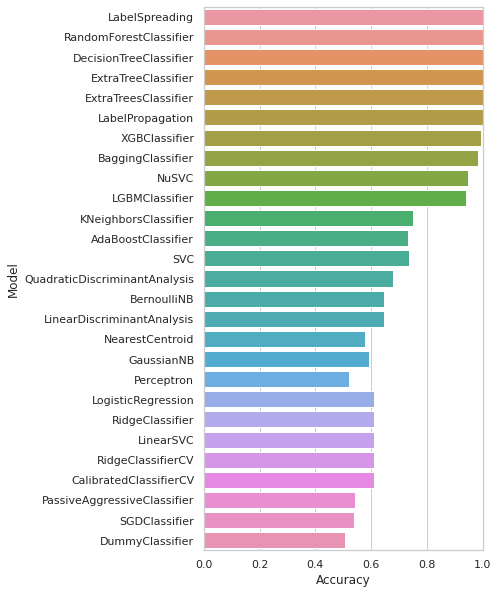

In [35]:
# Plot of Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="Accuracy", data=models_train)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

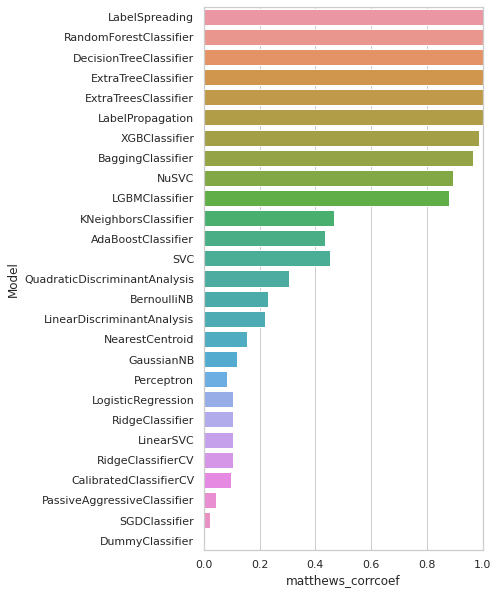

In [36]:
# Plot of MCC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="matthews_corrcoef", data=models_train)
ax.set(xlim=(0, 1))

---

# **Random Forest**

In [37]:
# Build random forest model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

### **Apply the model to make predictions**

In [38]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

### **Model performance**

In [39]:
feature['class']

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
1882    negative
1883    negative
1884    negative
1885    negative
1886    negative
Name: class, Length: 3145, dtype: object

In [40]:
# Simplest and quickest way to obtain the model performance (Accuracy)
rf.score(X_test,y_test)

0.7201907790143084

In [41]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.7201907790143084

In [42]:
# Matthew Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

0.4010272958256668

In [43]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[327,  50],
       [126, 126]])

In [44]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])

f = open('model_report.txt','w')
f.writelines(model_report) 
f.close()

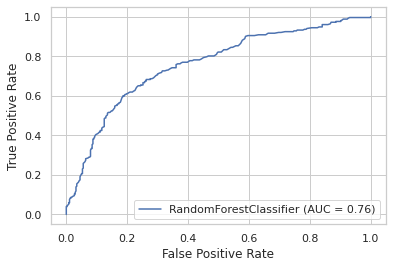

In [45]:
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf, X_test, y_test)  
plt.show()

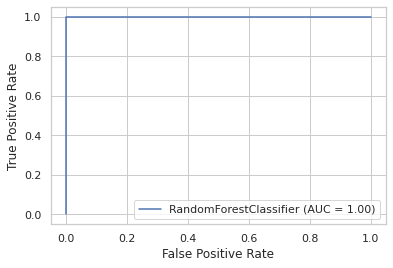

In [46]:
plot_roc_curve(rf, X_train, y_train)  
plt.show()

### **Feature importance**

In [47]:
# Display Dataframe of the dataset after feature selection (variance threshold)
X2

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,15.00,0.00,5.00,10.00,0.00,5.00,0.00,10.00,10.00,5.00,0.00,10.00,0.00,15.00,5.00,5.00,5.00,0.00,0.00,0.00
1,30.00,0.00,0.00,30.00,0.00,5.00,0.00,5.00,10.00,0.00,0.00,0.00,15.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00
2,25.00,0.00,8.33,0.00,16.67,8.33,0.00,8.33,8.33,16.67,0.00,0.00,0.00,0.00,8.33,0.00,0.00,0.00,0.00,0.00
3,20.00,0.00,5.00,5.00,0.00,20.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,15.00,0.00,10.00,0.00,5.00,10.00,5.00
4,7.14,14.29,0.00,7.14,0.00,35.71,0.00,7.14,0.00,0.00,0.00,7.14,0.00,0.00,0.00,7.14,7.14,0.00,0.00,7.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,8.00,0.00,0.00,4.00,4.00,8.00,0.00,0.00,0.00,8.00,0.00,0.00,16.00,0.00,20.00,16.00,8.00,8.00,0.00,0.00
1883,10.00,0.00,5.00,10.00,10.00,5.00,0.00,10.00,10.00,0.00,5.00,0.00,5.00,5.00,5.00,10.00,5.00,0.00,0.00,5.00
1884,5.00,0.00,0.00,15.00,5.00,5.00,0.00,10.00,10.00,0.00,5.00,5.00,5.00,15.00,5.00,0.00,10.00,5.00,0.00,0.00
1885,5.00,0.00,5.00,0.00,0.00,5.00,0.00,5.00,15.00,10.00,5.00,15.00,0.00,0.00,0.00,5.00,10.00,15.00,0.00,5.00


In [48]:
# Retrieve feature importance from the RF model
importance = pd.Series(rf.feature_importances_, name = 'Gini')

# Retrieve feature names
feature_names = pd.Series(X2.columns, name = 'Feature')

In [49]:
# Combine feature names and Gini values into a Dataframe
df = pd.concat([feature_names, importance], axis=1, names=['Feature', 'Gini'])
df

,Feature,Gini
0,AAC_A,0.06
1,AAC_C,0.03
2,AAC_D,0.07
3,AAC_E,0.05
4,AAC_F,0.05
5,AAC_G,0.06
6,AAC_H,0.03
7,AAC_I,0.05
8,AAC_K,0.06
9,AAC_L,0.07


Text(0.5, 0, 'Feature Importance')

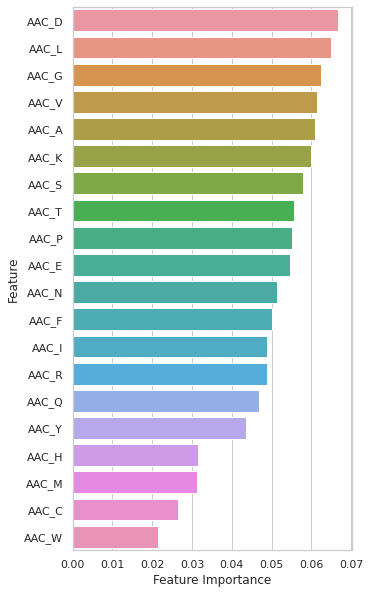

In [50]:
# Plot of feature importance
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df.sort_values('Gini', ascending=False)[:20] # Sort by Gini in descending order; Showing only the top 20 results

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'Gini', y = 'Feature', data = df_sorted)
plt.xlabel("Feature Importance")

---